# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [65]:
df = pd.read_csv('/content/drive/MyDrive/DBS/TUGAS MACHINE LEARNING/Dataset_inisiasi.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [66]:
df_oroginal = df.copy()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

In [67]:
#Melihat ukuran data
df.shape

(2512, 16)

Terdapat 2512 baris dan 16 kolom pada data

In [68]:
# Melihat tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Terdapat 11 kolom kategorik dan 5 kolom numerik

## 2. Menangani Data Yang Hilang

In [69]:
#Melihat apakah terdapat data kosong atau tidak
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Tidak terdapat kolom yang kosong

## 3. Analisis Distribusi dan Korelasi

In [70]:
numerical_features = df.select_dtypes(include=np.number).columns
skewness_values = df[numerical_features].skew()
print(skewness_values)

TransactionAmount      1.740107
CustomerAge            0.147864
TransactionDuration    0.599432
LoginAttempts          5.173491
AccountBalance         0.601201
dtype: float64


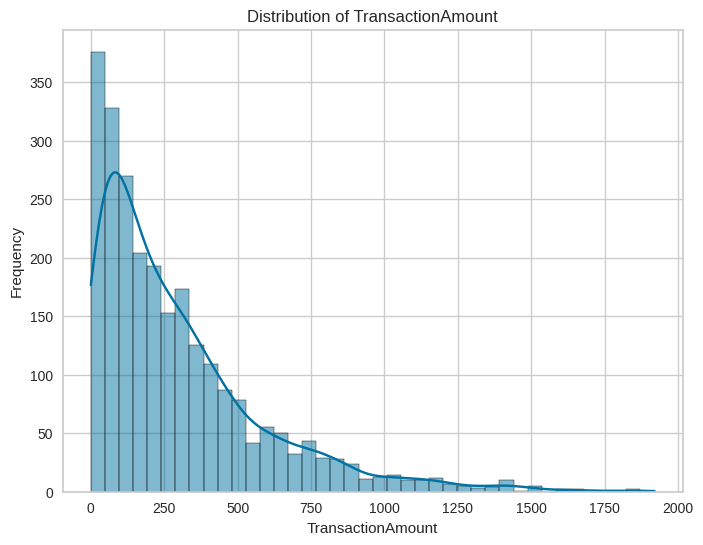

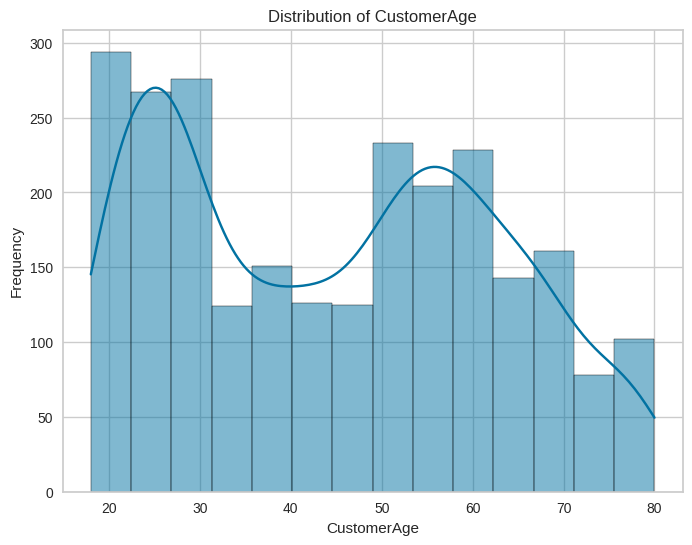

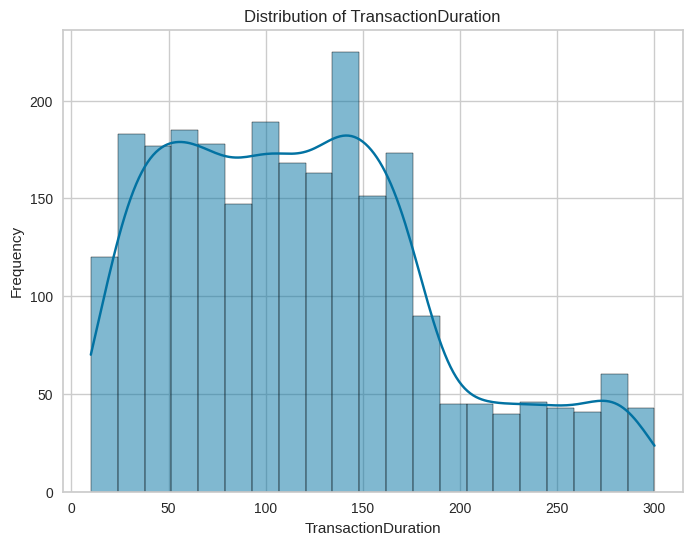

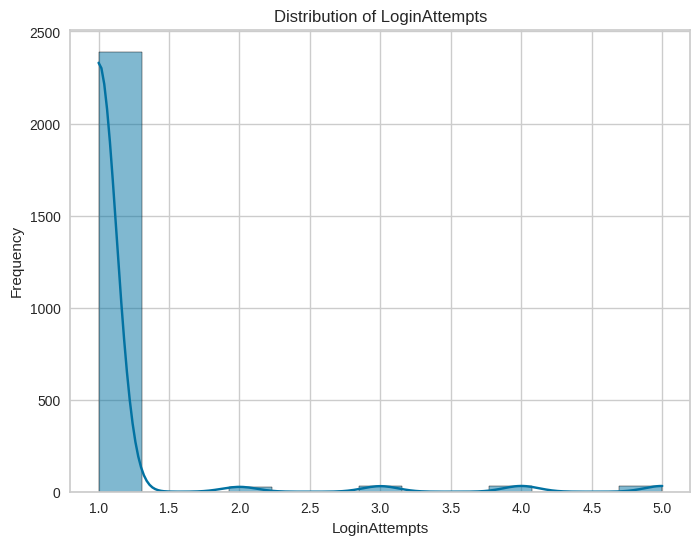

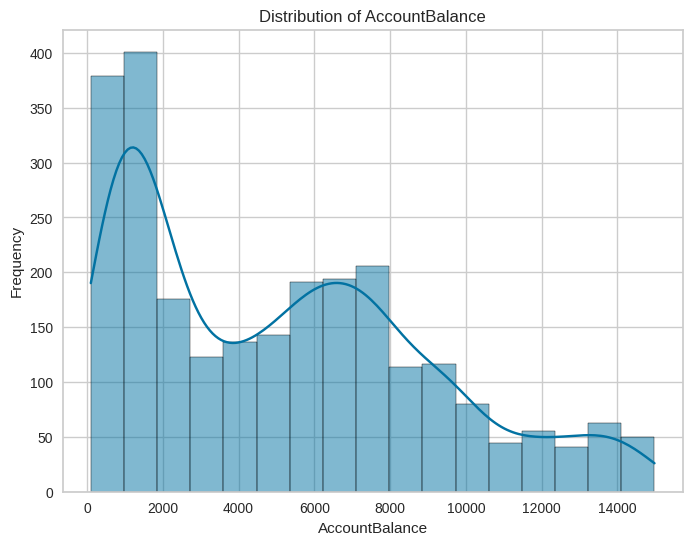

In [71]:
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


In [72]:
df[numerical_features].corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


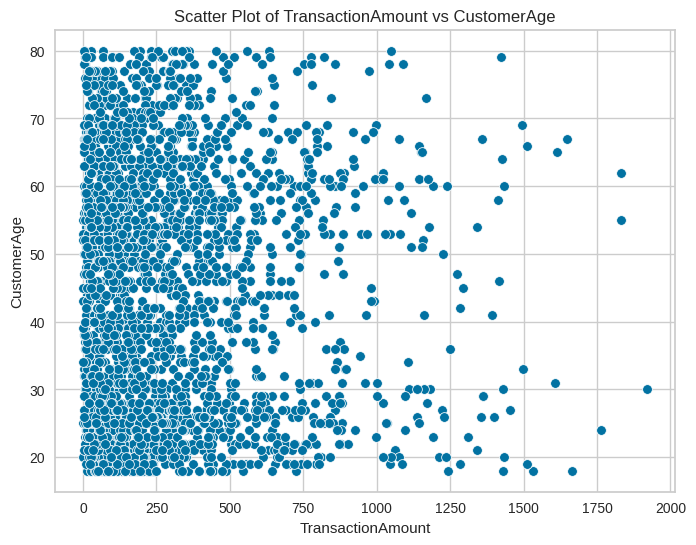

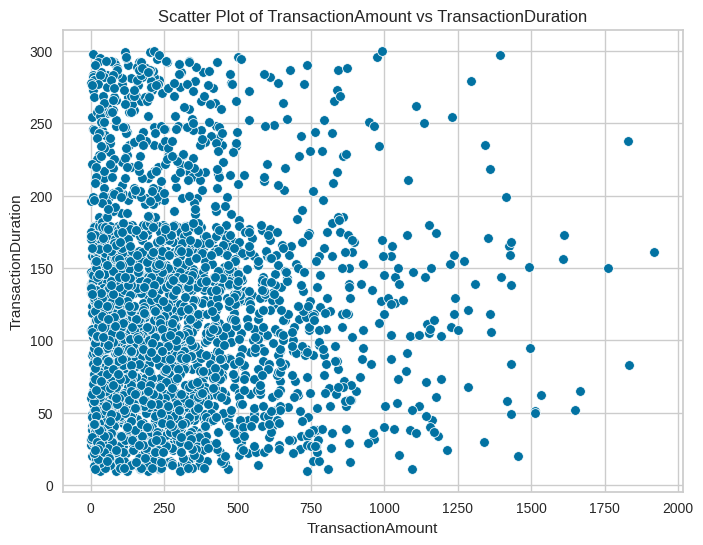

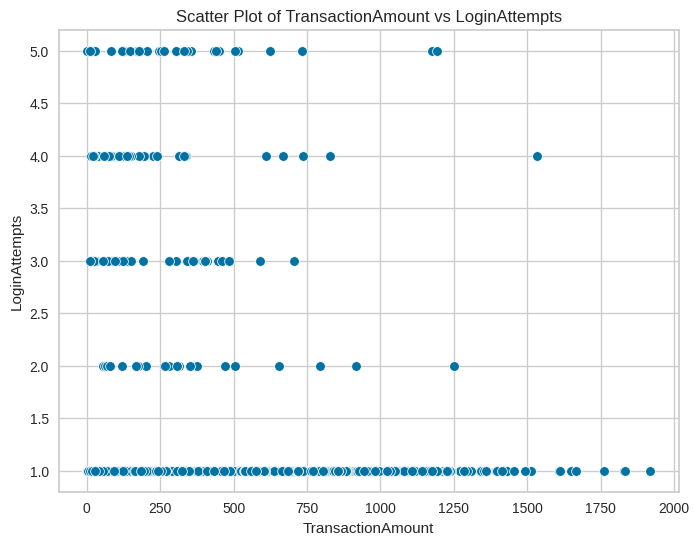

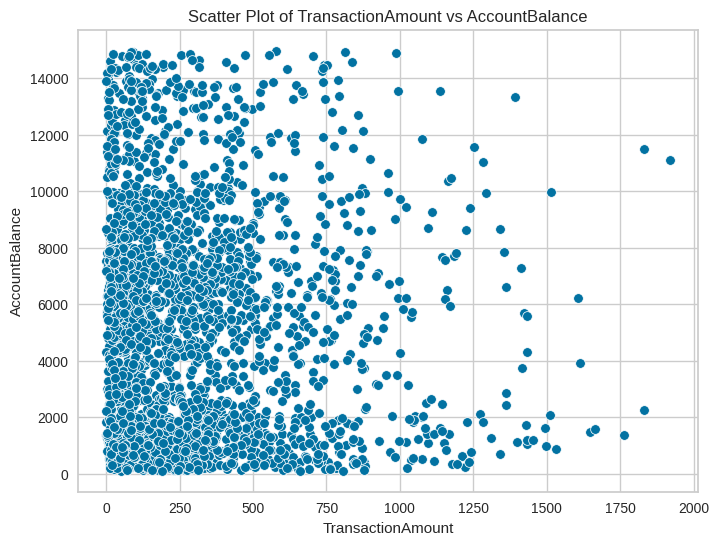

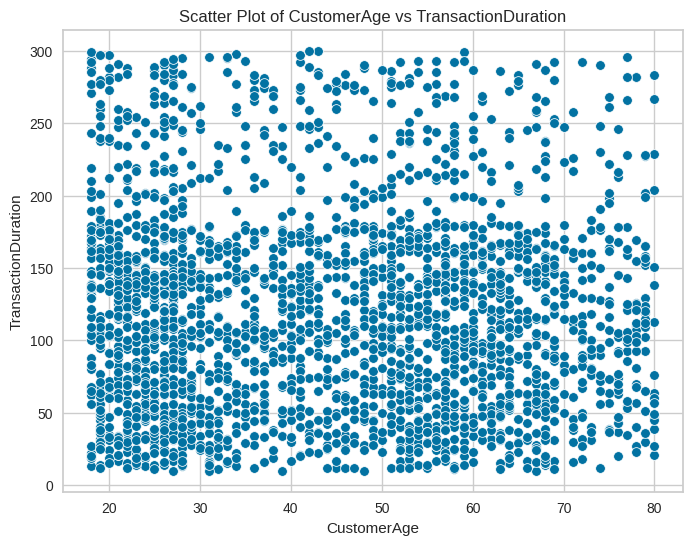

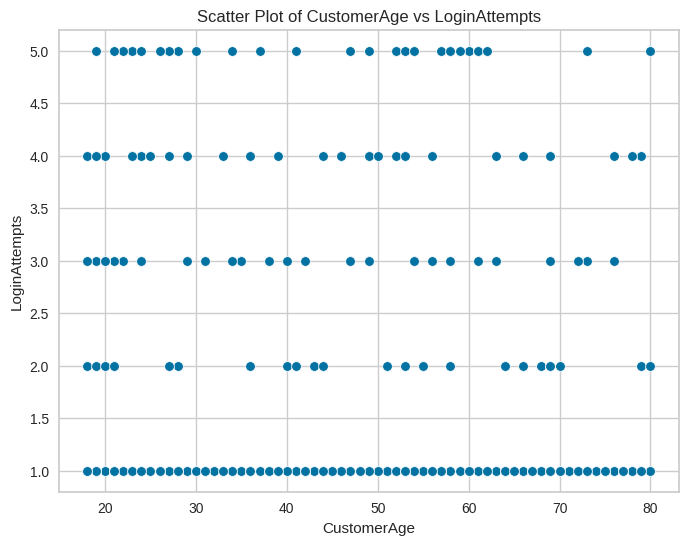

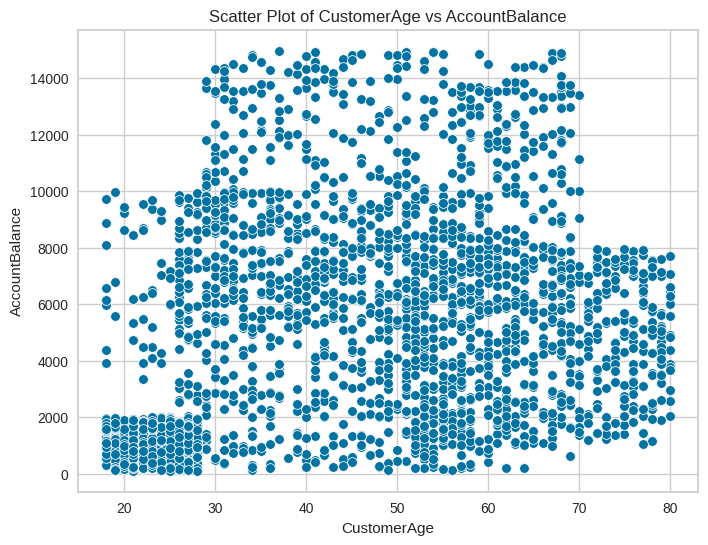

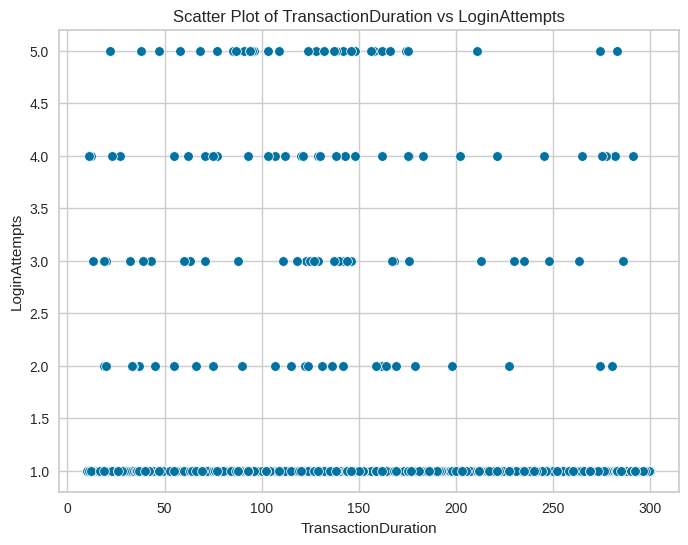

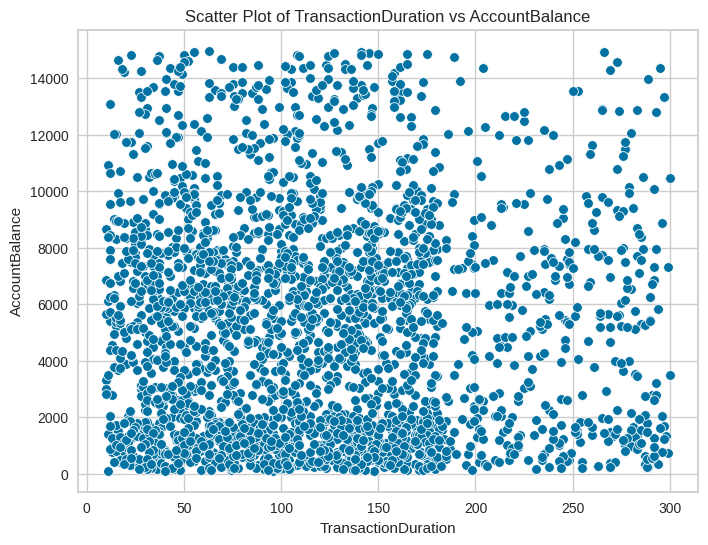

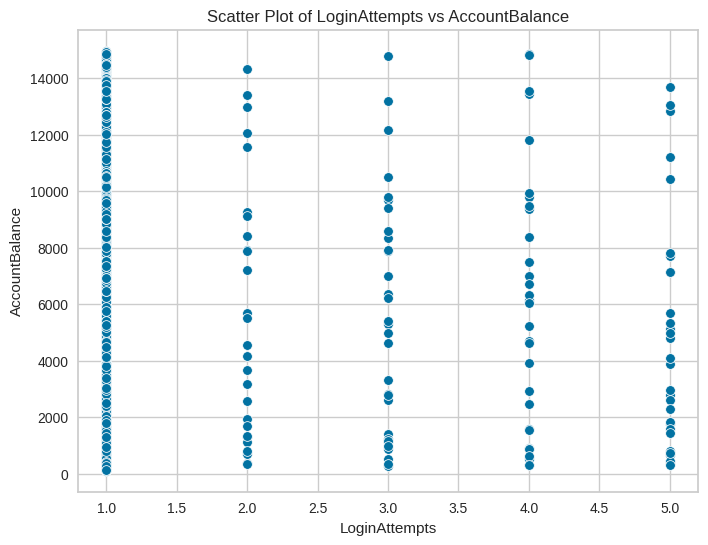

In [73]:
for i in range(0, len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=numerical_features[i], y=numerical_features[j])
        plt.title(f'Scatter Plot of {numerical_features[i]} vs {numerical_features[j]}')
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.show()


## 4.Visualisasi Data

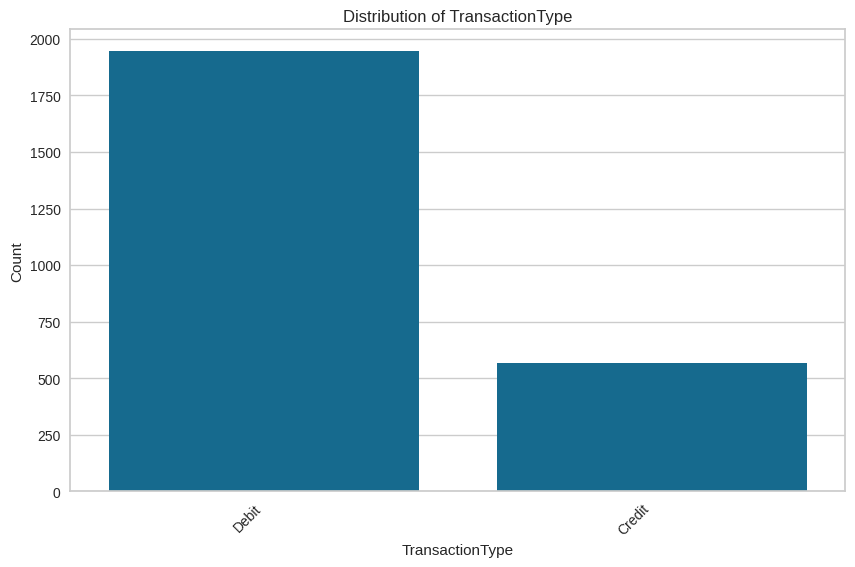

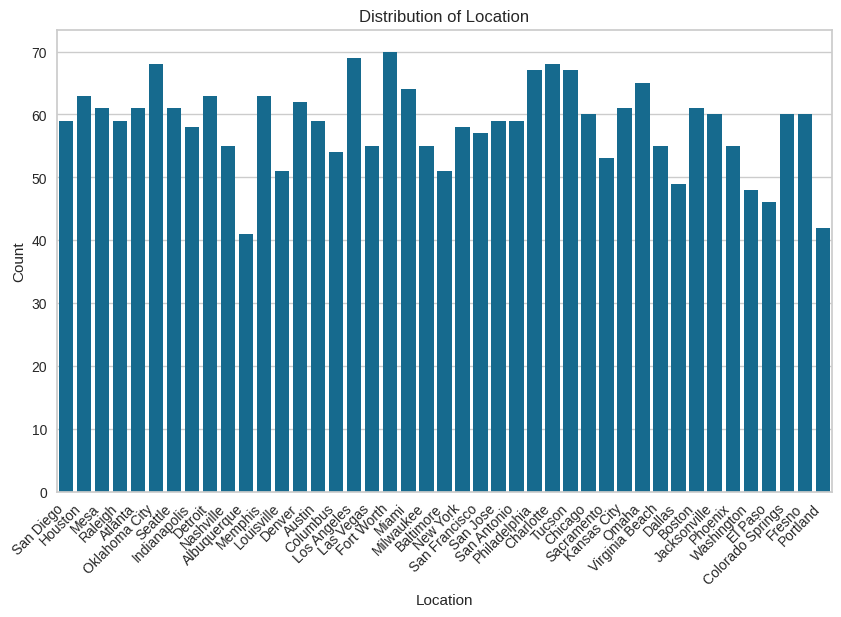

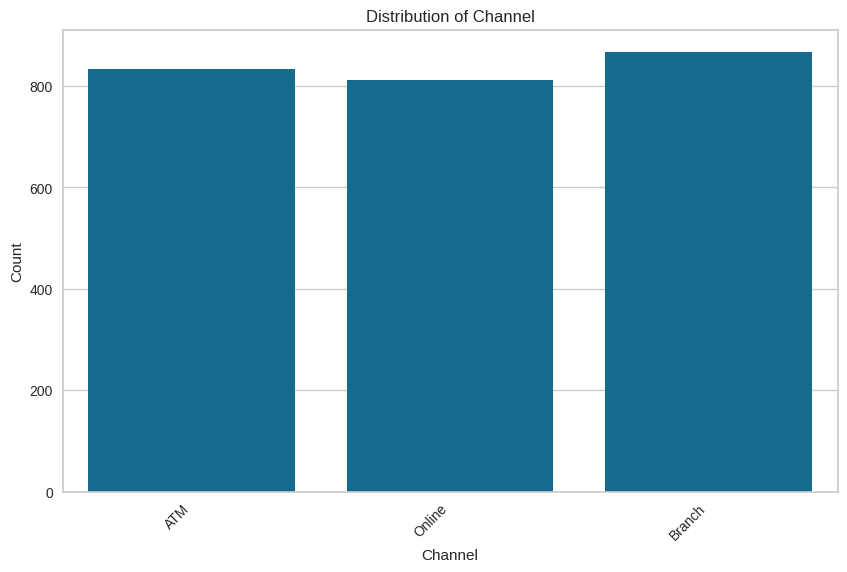

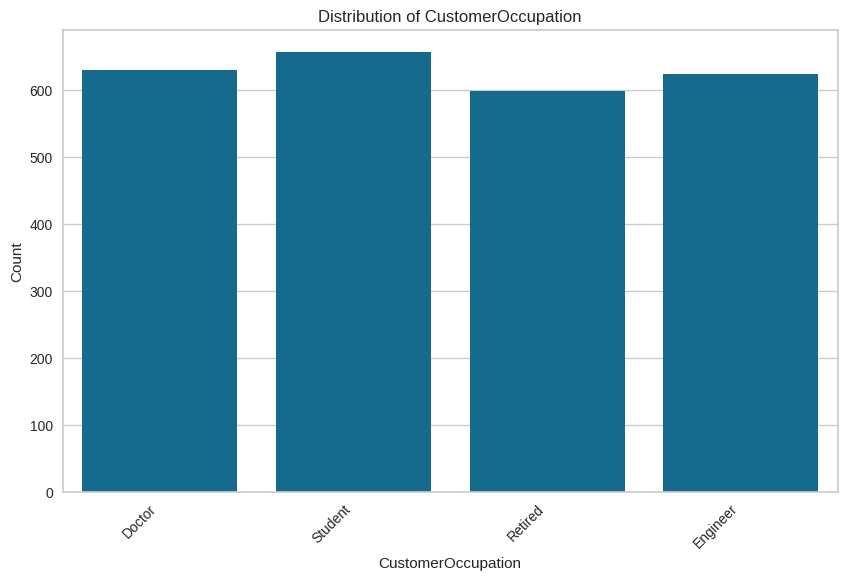

In [74]:
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_features:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.show()


<Axes: >

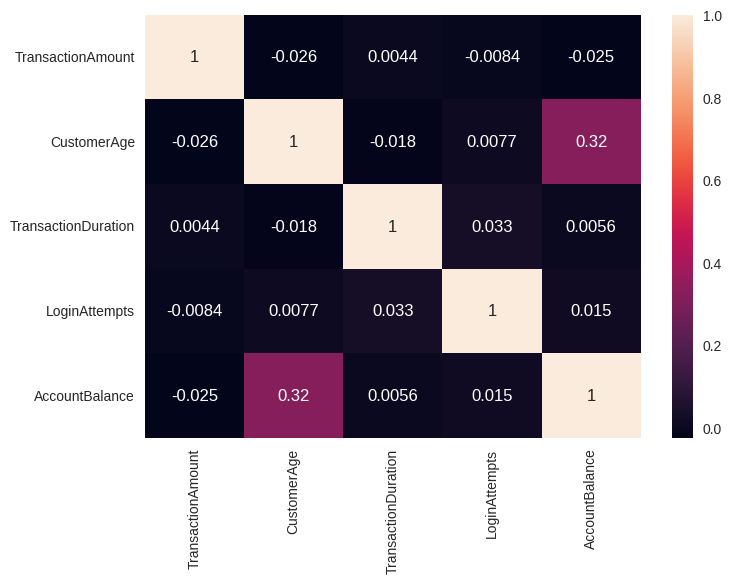

In [75]:
sns.heatmap(df[numerical_features].corr(), annot = True)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menghapus atau Mengangani Data Kosong (Missing Values)

In [76]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Tidak terdapat data kosong

## 2. Menghapus Data Duplikat

In [77]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data duplikat

## 4. Deteksi dan Penanganan Outlier

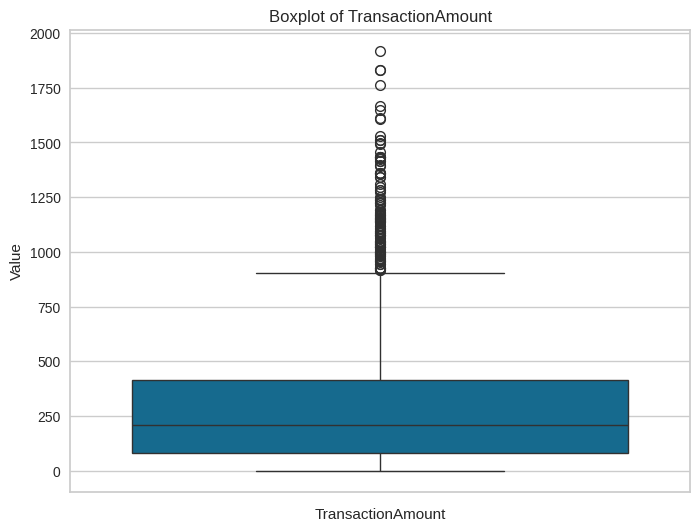

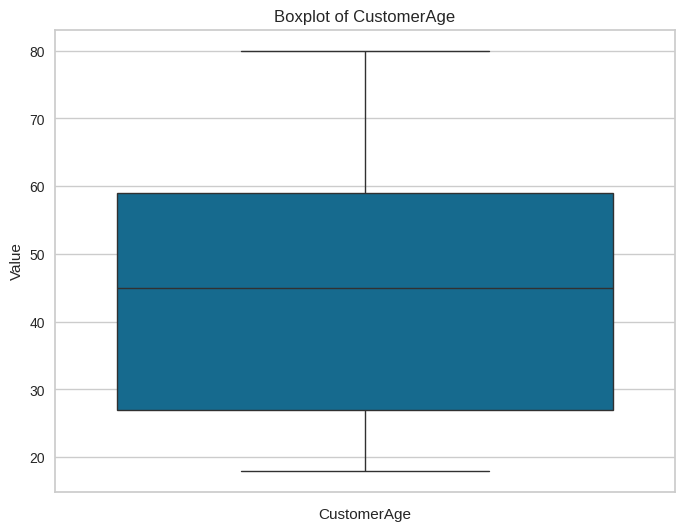

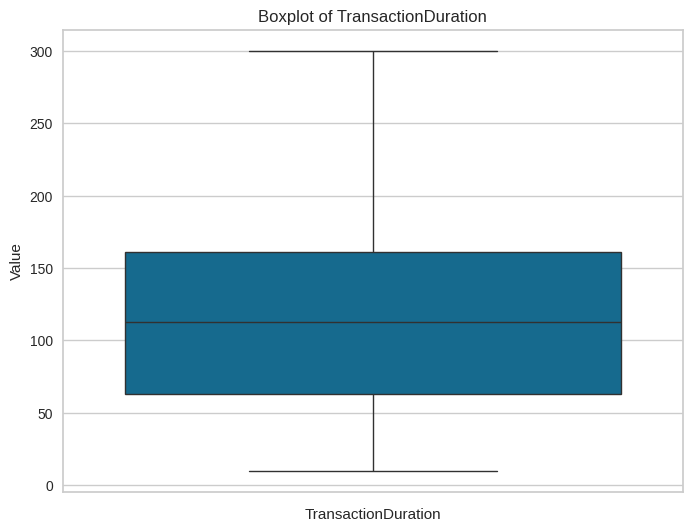

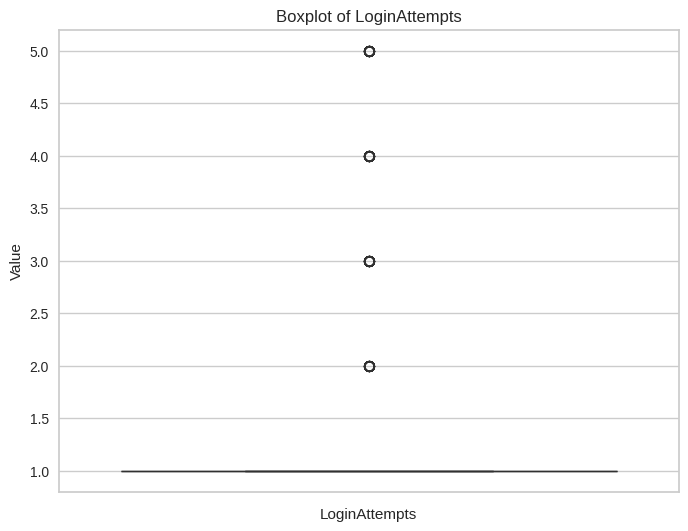

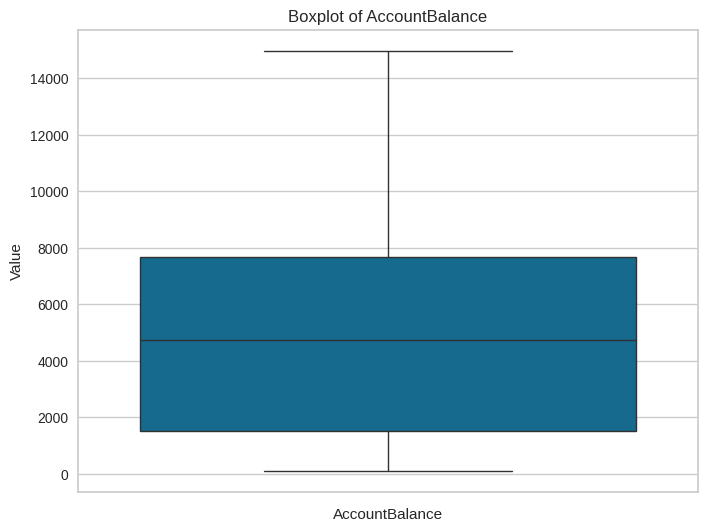

In [78]:
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.show()

In [79]:
for col in numerical_features:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df.loc[(df[col] < lower_bound), col] = lower_bound
  df.loc[(df[col] > upper_bound), col] = upper_bound

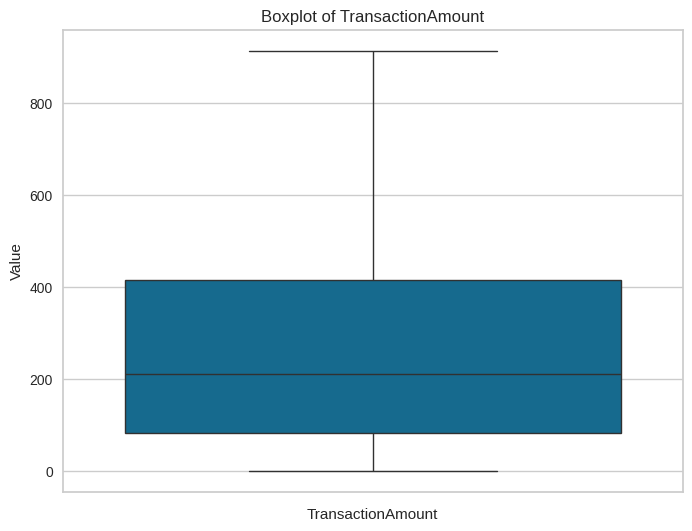

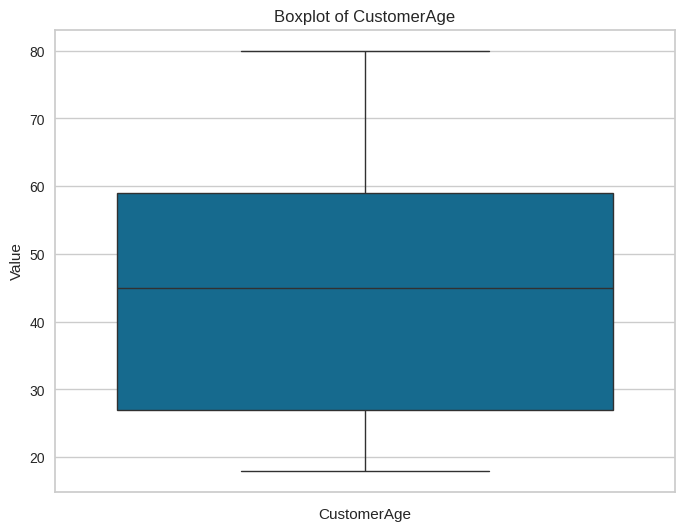

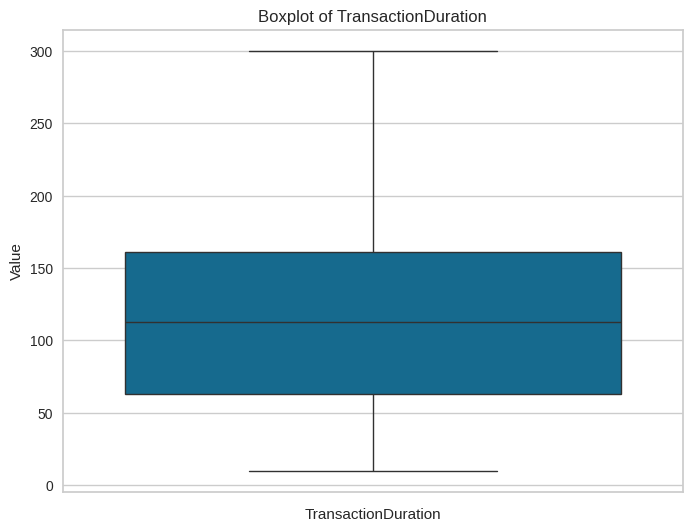

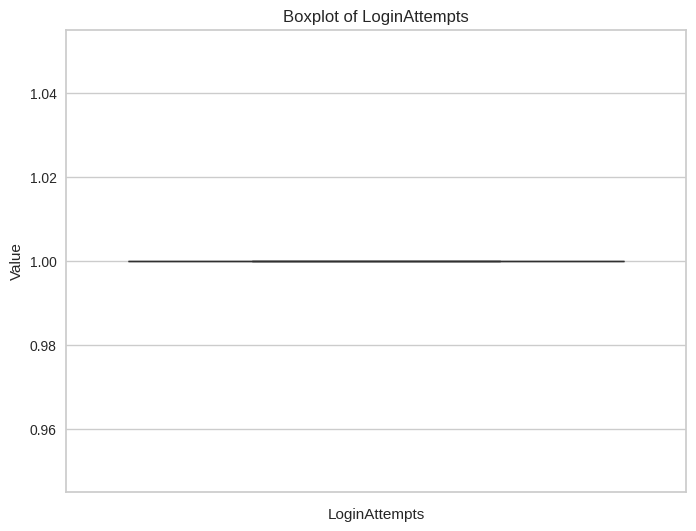

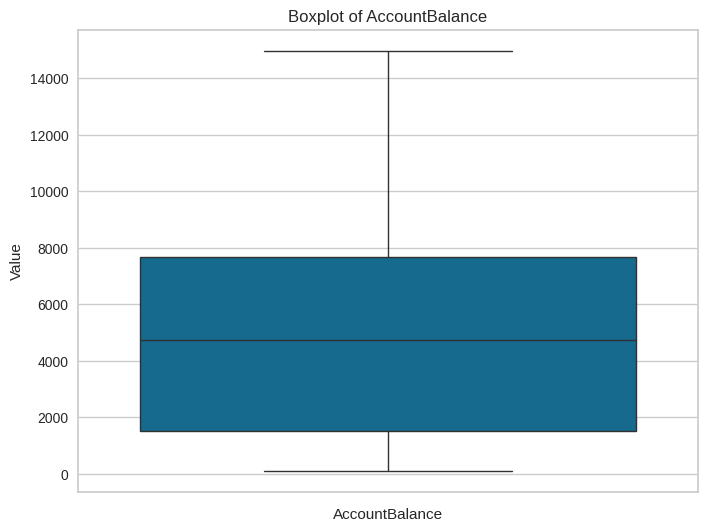

In [80]:
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.show()

In [81]:
df['LoginAttempts'].value_counts()

,count
LoginAttempts,
1,2512


## 6. Binning (Pengelompokan Data)

## 5. Encoding Data Kategorikal

In [82]:
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoder_dict = {}
encoder = LabelEncoder()

# Fit and store LabelEncoders for each categorical feature
for col in categorical_features:
    encoder_dict[col] = LabelEncoder()  # Create a new LabelEncoder
    df[col] = encoder_dict[col].fit_transform(df[col])  # Fit and transform

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,36,D000380,162.198.218.92,M015,0,70,0,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,15,D000051,13.149.61.4,M052,0,68,0,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,23,D000235,215.97.143.157,M009,2,19,3,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,33,D000187,200.13.225.150,M002,2,26,3,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,1,D000308,65.164.3.100,M091,2,26,3,198,1,7429.40,2024-11-04 08:06:39


In [83]:
encoder_dict

{'TransactionType': LabelEncoder(),
 'Location': LabelEncoder(),
 'Channel': LabelEncoder(),
 'CustomerOccupation': LabelEncoder()}

In [84]:
df = df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'])
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70,0,81,1,5112.21
1,376.24,1,15,0,68,0,141,1,13758.91
2,126.29,1,23,2,19,3,56,1,1122.35
3,184.50,1,33,2,26,3,25,1,8569.06
4,13.45,0,1,2,26,3,198,1,7429.40


## 3. Normalisasi atau Standarisasi Fitur

In [85]:
df.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [86]:
Scaler = MinMaxScaler()
df_scalled = Scaler.fit_transform(df[numerical_features])
df_scalled = pd.DataFrame(df_scalled, columns=df[numerical_features].columns)
df_scalled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.015144,0.838710,0.244828,0.0,0.336832
1,0.411703,0.806452,0.451724,0.0,0.918055
2,0.138004,0.016129,0.158621,0.0,0.068637
3,0.201745,0.129032,0.051724,0.0,0.569198
4,0.014443,0.129032,0.648276,0.0,0.492591


In [87]:
df_scalled = pd.concat([df_scalled, df[categorical_features]], axis=1)
df_scalled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
0,0.015144,0.838710,0.244828,0.0,0.336832,1,36,0,0
1,0.411703,0.806452,0.451724,0.0,0.918055,1,15,0,0
2,0.138004,0.016129,0.158621,0.0,0.068637,1,23,2,3
3,0.201745,0.129032,0.051724,0.0,0.569198,1,33,2,3
4,0.014443,0.129032,0.648276,0.0,0.492591,0,1,2,3


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [88]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans.fit(df_scalled)

KMeans(n_clusters=4, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

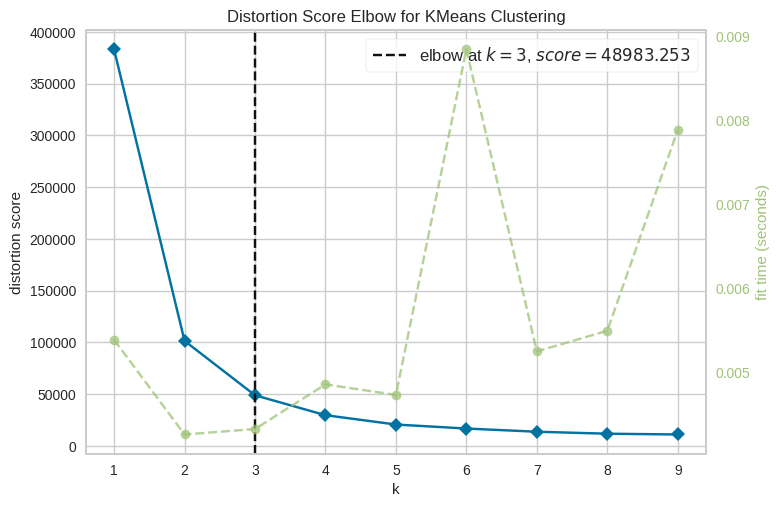

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
kmeans = KMeans(random_state=42)
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_scalled)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [90]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(df_scalled)

KMeans(n_clusters=3, random_state=42)

In [91]:
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_scalled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5411643635407434


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [92]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_scalled)

In [93]:
# Feature Selection using SelectKBest
selector1 = SelectKBest(chi2, k=5) # Select top 5 features
X_new = selector1.fit_transform(df_scalled, labels) # labels are the cluster assignments from kmeans

# Get the indices of the selected features
selected_feature_indices = selector1.get_support(indices=True)

# Get the names of the selected features
selected_features = df_scalled.columns[selected_feature_indices]

print("Selected Features:", selected_features)


# Feature Selection using RFE
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector2 = RFE(estimator, n_features_to_select=5, step=1)
X_new_rfe = selector2.fit_transform(df_scalled, labels)

# Get the indices of the selected features
selected_feature_indices_rfe = selector2.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe = df_scalled.columns[selected_feature_indices_rfe]
print("Selected Features (RFE):", selected_features_rfe)


# Select only numerical features for variance thresholding
selector3 = VarianceThreshold(threshold=0.15)
df_selected = selector3.fit_transform(df_scalled, labels)

# Get the indices of the selected features
selected_feature_indices_var = selector3.get_support(indices=True)

# Get the names of the selected features
selected_features_var = df_scalled.columns[selected_feature_indices_var]

print("Selected Feature (Variance Threshold):", selected_features_var)

Selected Features: Index(['CustomerAge', 'TransactionDuration', 'AccountBalance',
       'TransactionType', 'Location'],
      dtype='object')
Selected Features (RFE): Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance', 'Location'],
      dtype='object')
Selected Feature (Variance Threshold): Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')


In [94]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(df_pca)
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_pca, labels)
print(f"Silhouette Score With PCA: {silhouette_avg}")

Silhouette Score With PCA: 0.5437776704654552


In [95]:
df_Select = df_scalled[selected_features]

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(df_Select)
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_Select, labels)
print(f"Silhouette Score With SelectKBest: {silhouette_avg}")

Silhouette Score With SelectKBest: 0.5740430346785914


In [96]:
df_RFE = df_scalled[selected_features_rfe]

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(df_RFE)
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_RFE, labels)
print(f"Silhouette Score With RFA: {silhouette_avg}")

Silhouette Score With RFA: 0.5761566781076166


In [97]:
df_VarThr = df_scalled[selected_features_var]

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(df_VarThr)
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_VarThr, labels)
print(f"Silhouette Score With VarThr: {silhouette_avg}")

Silhouette Score With VarThr: 0.5456363333023377


In [98]:
df_num = df_scalled[numerical_features]

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(df_num)
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_num, labels)
print(f"Silhouette Score With Numerical: {silhouette_avg}")

Silhouette Score With Numerical: 0.2671140997059733


In [99]:
parameter = [chi2, f_classif, mutual_info_classif] # Assign the functions to the list
best_silhouette = 0
best_k = 2
best_n = 5
features = ''
best_params = ''
for parameter in parameter:
  for n in range(5,11):
      selector1 = SelectKBest(score_func=parameter, k=n) # Pass the function, not the string
      X_new = selector1.fit_transform(df_scalled, labels) # labels are the cluster assignments from kmeans
      selected_feature_indices = selector1.get_support(indices=True)
      selected_features = df_scalled.columns[selected_feature_indices]
      for k in range(2, 10):
          kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
          labels = kmeans.fit_predict(df_scalled[selected_features])
          silhouette_avg = silhouette_score(df_scalled[selected_features], labels)

          if silhouette_avg > best_silhouette:
              best_silhouette = silhouette_avg
              best_k = k
              best_n = n
              features = selected_features
              best_params = parameter # Assign the function object

print(f'Optimal K: {best_k}, Banyaknya Fitur: {best_n}, Parameter: {best_params}, Silhouette Score: {best_silhouette}')
print(features)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/

Optimal K: 2, Banyaknya Fitur: 5, Parameter: <function chi2 at 0x7ac67ef04d60>, Silhouette Score: 0.6084156596691915
Index(['TransactionAmount', 'CustomerAge', 'AccountBalance', 'Location',
       'CustomerOccupation'],
      dtype='object')


In [100]:
# Clustering dengan KMeans dan Evaluasi Silhouette Score
best_silhouette = 0
best_k = 2
best_n = 5

for n in range(5,11):
    estimator = LogisticRegression(random_state=42)
    selector2 = RFE(estimator, n_features_to_select=n, step=1)
    X_new_rfe = selector2.fit_transform(df_scalled, labels)
    selected_feature_indices_rfe = selector2.get_support(indices=True)
    selected_features_rfe = df_scalled.columns[selected_feature_indices_rfe]
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(df_scalled[selected_features_rfe])
        silhouette_avg = silhouette_score(df_scalled[selected_features_rfe], labels)

        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_k = k
            best_n = n

print(f'Optimal K: {best_k} dengan Banyaknya Fitur: {best_n} dengan Silhouette Score: {best_silhouette}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimal K: 2 dengan Banyaknya Fitur: 8 dengan Silhouette Score: 0.600579821420128


In [101]:
best_silhouette = 0
best_k = 2
best_n = 2

for n in range(2, 6):  # Changed the range to ensure n_components is valid
    pca = PCA(n_components=n)
    df_pca = pca.fit_transform(df_scalled[numerical_features])
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(df_pca)
        silhouette_avg = silhouette_score(df_pca, labels)

        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_k = k
            best_n = n # assign n instead of i

print(f'Optimal K: {best_k} dengan Banyaknya Fitur: {best_n} dengan Silhouette Score: {best_silhouette}')

Optimal K: 3 dengan Banyaknya Fitur: 2 dengan Silhouette Score: 0.4556064774703958


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [102]:
df_final = df_scalled[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'Location',
       'CustomerOccupation']]

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(df_final)
labels_final = kmeans.labels_
silhouette_avg = silhouette_score(df_final, labels_final)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6084156596691915


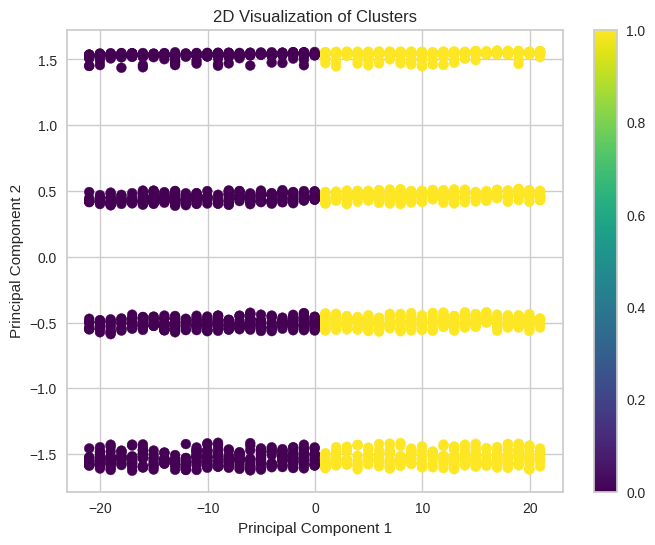

In [103]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_final, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Clusters')
plt.colorbar()
plt.show()


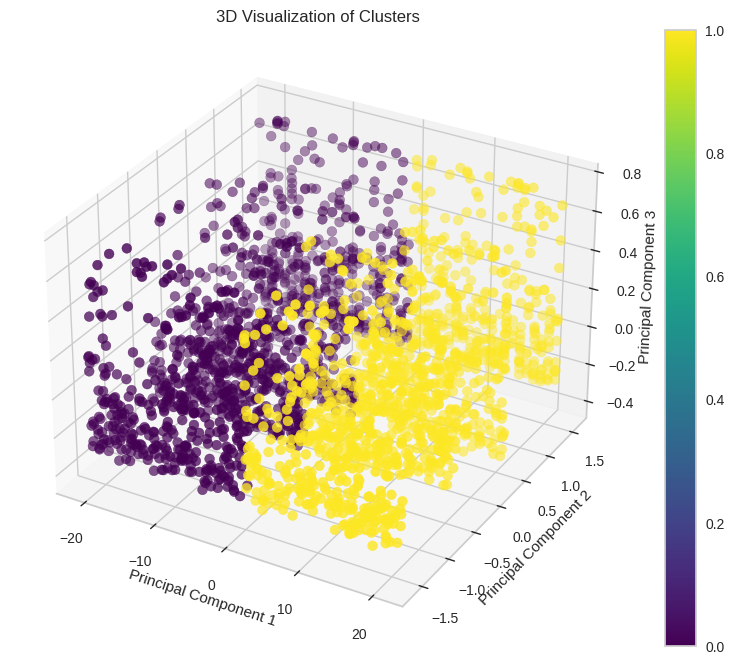

In [104]:
pca1 = PCA(n_components=3)
df_pca1 = pca1.fit_transform(df_final)
# Assuming df_pca is your 3D PCA-transformed data and labels are the cluster assignments
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
scatter = ax.scatter(df_pca1[:, 0], df_pca1[:, 1], df_pca1[:, 2], c=labels_final, cmap='viridis', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Clusters')

# Add a colorbar to show the cluster labels
plt.colorbar(scatter)

plt.show()


In [105]:
df_db = df_scalled[['TransactionType', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'AccountBalance']]

db = DBSCAN().fit(df_db)
labels = db.labels_
silhouettesb = silhouette_score(df_db, labels)
print(f"Silhouette Score: {silhouettesb}")

Silhouette Score: 0.7331319196452342


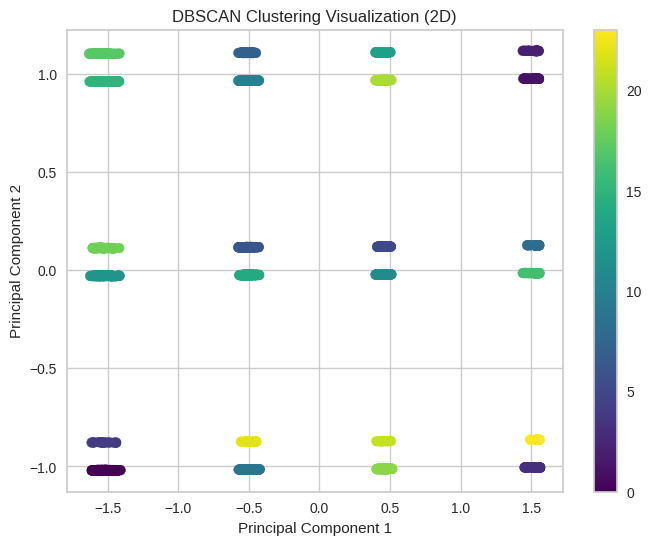

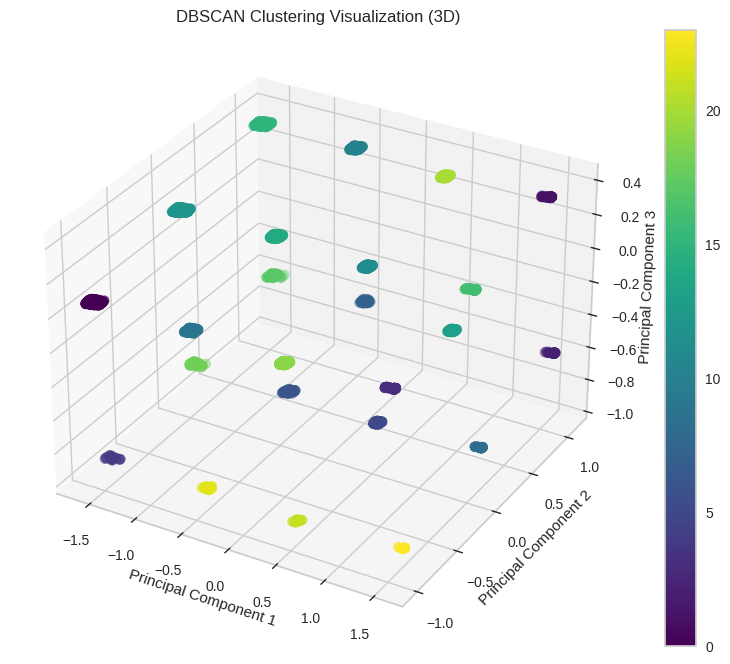

In [106]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_db)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Visualization (2D)')
plt.colorbar()
plt.show()

pca1 = PCA(n_components=3)
df_pca1 = pca1.fit_transform(df_db)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca1[:, 0], df_pca1[:, 1], df_pca1[:, 2], c=labels, cmap='viridis', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clustering Visualization (3D)')
plt.colorbar(scatter)
plt.show()


['TransactionType', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'AccountBalance']

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [107]:
df_scalled['Cluster'] = labels_final
df_scalled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster
0,0.015144,0.838710,0.244828,0.0,0.336832,1,36,0,0,1
1,0.411703,0.806452,0.451724,0.0,0.918055,1,15,0,0,0
2,0.138004,0.016129,0.158621,0.0,0.068637,1,23,2,3,1
3,0.201745,0.129032,0.051724,0.0,0.569198,1,33,2,3,1
4,0.014443,0.129032,0.648276,0.0,0.492591,0,1,2,3,0


In [108]:
for col in categorical_features:
    df_scalled[col] = encoder_dict[col].inverse_transform(df_scalled[col])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [109]:
df_scalled[numerical_features] = Scaler.inverse_transform(df_scalled[numerical_features])
df_scalled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,1
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,1
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,1
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [111]:
df_scalled[numerical_features].groupby(df_scalled['Cluster']).mean()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
Cluster,,,,,
0,283.060133,45.071763,120.944618,1.0,5159.046677
1,286.709920,44.259350,118.286992,1.0,5067.667650


In [112]:
df_scalled[numerical_features].groupby(df_scalled['Cluster']).var()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
Cluster,,,,,
0,63157.526408,319.120529,5121.390373,0.0,1.499859e+07
1,63979.296026,313.816328,4659.257683,0.0,1.545349e+07


In [114]:
df_scalled[categorical_features].groupby(df_scalled['Cluster']).describe()

TransactionType                     Location                        \
                  count unique    top  freq    count unique            top   
Cluster                                                                      
0                  1282      2  Debit  1005     1282     22     Fort Worth   
1                  1230      2  Debit   939     1230     21  Oklahoma City   

             Channel                     CustomerOccupation                  \
        freq   count unique     top freq              count unique      top   
Cluster                                                                       
0         70    1282      3  Branch  451               1282      4   Doctor   
1         68    1230      3  Branch  417               1230      4  Student   

              
        freq  
Cluster       
0        334  
1        333

Tulis hasil interpretasinya di sini.
1. Cluster 1: Fraud
2. Cluster 2: Not Fraud

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata TransactionDuration :** 120.944618
- **Varian TransactionAmount :** 5121.390373
- **Modus CustomerOccupation: ** Doctor
- **Analisis:** Cluster ini mencakup pelanggan dengan rata rata durasi transaksi lebih tinggi sedikit, dan perbedaan varian yang cukup signifikan berbeda, dan banyaknya pekerjaan dokter. Hal ini menunjukkan bahwa banyaknya perbedaan waktu transaksi, indikasi saya adalah ini merupakan suatu penipuan diperkuat dengan jumlah dari kalangan dokter yang mungkin saja berpura pura untuk menjadi sebuah penipu

## Cluster 2:
- **Rata-rata TransactionDuration :** 118.286992
- **Varian TransactionAmount (1-100):** 4659.257683
- **Modus CustomerOccupation:** Student
- **Analisis:** Cluster ini mencakup pelanggan dengan rata rata durasi transaksi sedikit lebih rendah, dan perbedaan varian yang cukup signifikan rendah, dan banyaknya pekerjaan sebagai siswa. Hal ini menunjukkan bahwa memungkinkan bahwa siswa menggunakan hanya untuk kepentingan pribadi saja


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_scalled.to_csv('df_scalled.csv', index=False)